# Transformada de Fourier

A série de Fourier fornece uma representação extremamente útil para **funções periódicas**. No entanto, **muitas vezes precisamos lidar com funções que não são periódicas**. 


Uma ferramenta mais geral do que a série de Fourier é necessária neste caso. É aí que entra a **transformada de Fourier**!

## Sinal sinusóide complexo

✅ Lembre que em um sinal periódico:

* $\omega_0$ é a frequencia angular do sinal medida em rad/s ($\omega_0 = 2\pi F_0$, sendo $F_0$ a frequencia fundamental medida em Hertz)
* $T_0$ é o período fundamental do sinal ($T_0 = \frac{1}{F_0} = \frac{2\pi}{|w_0|}$) 

✅ O sinal sinusóide complexo é portanto definodo como:

<font size="4">$$x_s(t)= |A|e^{j\theta}e^{j\omega_0 t} = |A|e^{j\theta}e^{\frac{jt}{T_0}} = |A|e^{j\theta}e^{\frac{j2\pi t}{T_0}}$$</font>

✅ Se tomarmos um sinal sinusóide complexo com fase $\theta = 0$. Temos:

<font size="4">$$x_s(t)= |A|e^{j\omega_0 t} = |A|e^{\frac{jt}{T_0}} = |A|e^{\frac{j2\pi t}{T_0}}$$</font>

✅ Podemos reescrever $x(t)$ como segue:

<font size="4"> $$x_s(t) = |A|e^{\frac{j2\pi t}{T_0}} = |A| \cos(\frac{2 \pi t}{T_0}) + j |A| \sin(\frac{2\pi t}{T_0})$$ </font>

Sendo as partes da expressão do lado esquerdo da equação referentes a suas partes real e imagiária, **respectivamente**.


✅ Sobre o coeficiente complexo $A$:

Suponha $A=-\frac{\sqrt{3}}{2} - \frac{1}{2}j$
Este valor de $A$ nos dará um sinusóide complexa de amplitude aproximadamente igual a 1.

Suponha $A = 4+\frac{1}{2}j$
Este valor de $A$ nos dará um sinusóide complexa de amplitude aproximadamente igual a 4.

In [1]:
import numpy as np

a = -(np.sqrt(3)/2)
b= 0.5
# A = - np.sqrt(3)/2 - 0.5j
A = a - b*1j
print(np.abs(A))

0.9999999999999999


### Exemplos de Sinusoides complexas:

In [2]:
def sinusoide(t, A = - np.sqrt(3)/2 - 0.5j, f_0 = 1, t_0 = 2*np.pi):
    omega = 2*np.pi*f_0 
    t_0 = 1/omega
    return np.abs(A)*np.cos((2*np.pi*t)/t_0) + np.abs(A)*np.sin((2*np.pi*t)/t_0)*1j

✅ Para:

*  $\theta = 0$
*  $A=-\frac{\sqrt{3}}{2} - \frac{1}{2}j$

Nossa sinusóde se resumiria a: $x_s(t) = \cos(\frac{2 \pi t}{T_0}) + j\sin(\frac{2\pi t}{T_0})$ :

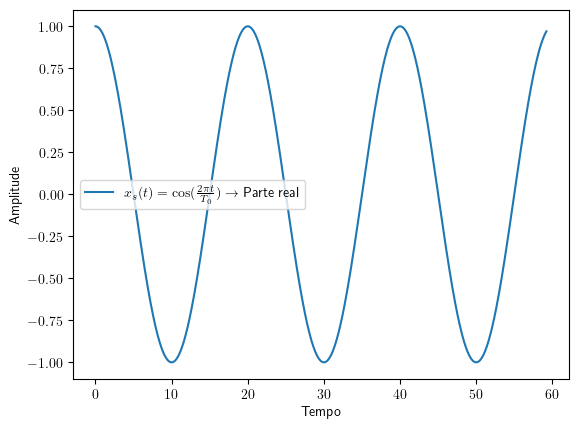

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
# from basic_units import radians

t = np.linspace(0,3*np.pi,1000)

curva_sinusoide_1 = sinusoide(t, f_0= 0.05, A = 1) # p = 4*np.pi

t_rad = [val*2*np.pi for val in t]

fig = plt.figure()
plt.plot(t_rad, np.real(curva_sinusoide_1), xunits = 2*np.pi)
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend([r'$x_s(t) = \cos( \frac{2 \pi t}{T_0}) \rightarrow $ Parte real'])
plt.show()

## Séries de Fourier

✅ Nós aprendemos que podemos representar uma função (de valores reais) periódica $x(t)$  como uma **combinação linear** de **sinusóides complexas** $x_s(t)$ relacionadas:

<font size="4"> $$x(t) = \sum_{k=-\infty}^{\infty} c_k [x_s(t)]_k =  \sum_{k=-\infty}^{\infty} c_k e^{jk\omega_0t} = \sum_{k=-\infty}^{\infty} c_k e^{\frac{jkt}{T_0}}$$</font>

<font size="4"> $$x_s(t) = \sum_{k=-\infty}^{\infty} |A_k| \cos(\frac{2 \pi t}{T_0}) + |A_k| j \sin(\frac{2\pi t}{T_0})$$ </font>


Dessa forma, seja  $x(t): \mathbb{R}\rightarrow \mathbb{R}$ uma função periódica de período $T_0$. E seja $x(t)$ **limitada**, **contínua** e **integrável**, no intervalo $[0,T_0]$, tal função pode ser representada como série de Fourier de forma real:

$$x(t) = \frac{a_0}{2} + \sum_{k=1}^{\infty} a_k \cos{(\frac{2 \pi k t}{T_0})} + b_k j \sin{(\frac{2 \pi k t}{T_0}})$$

Os coeficientes $a_k$ e $b_k$ são valores reais definidos como:

* $a_0 = \frac{2}{T_0} \int_0^{T_0} x(t)dt$
* $a_k = \frac{2}{T_0} \int_0^{T_0} x(t)\cos{(\frac{2\pi k t}{T_0})}dt$
* $b_k = \frac{2}{T_0} \int_0^{T_0} x(t)\sin{(\frac{2\pi k t}{T_0})}dt$

Retornando a representação na forma exponencial (aplicando a fórmula de Euler), $x(t)$ pode ser expressa como segue:

$$x(t) = \sum_{n=1}^{\infty} c_k e^{jk\omega_0 t} =\sum_{n=1}^{\infty} c_ke^{\frac{2\pi k t}{T_0}}$$

### Exemplo de série de Fourier

Abaixo segue uma função periórica real, aproximada por uma série de Fourier:

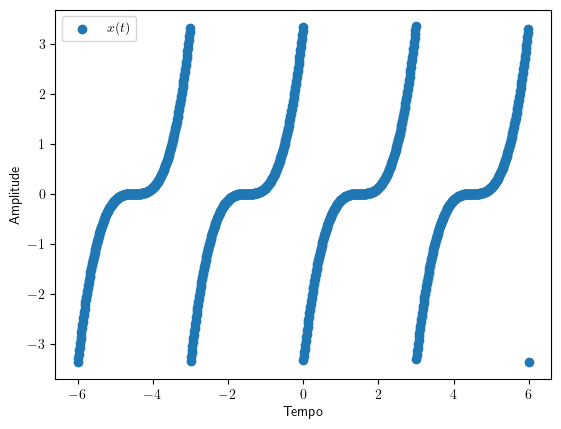

In [4]:
import scipy.integrate as spi

T_0 = 3.0

def x(t):
    return ((t % T_0) - (T_0 / 2.0)) ** 3

# x = lambda t: ((t % T_0) - (T_0 / 2.)) ** 3

t = np.linspace(-6, 6, 1000)
x_t = x(t) 

plt.scatter(t,x_t)
plt.xlabel("Tempo")
plt.ylabel("Amplitude")
plt.legend([r'$x(t)$'])
plt.show()

In [5]:
# Função que computa os coeficientes reais a_k e b_k para todos os valores de k: (a_0, 0), (a_1, b_1)...(a_k, b_k)
def coeficientes_de_fourier(func, maxK):
    resultado = []
    for k in range(maxK+1):
        a_k = (2./T_0) * spi.quad(lambda t: func(t) * np.cos(2 * np.pi * k * t / T_0), 0, T_0)[0]
        b_k = (2./T_0) * spi.quad(lambda t: func(t) * np.sin(2 * np.pi * k * t / T_0), 0, T_0)[0]
        resultado.append((a_k, b_k))
    return np.array(resultado)

In [6]:
# Função que enconra a sinusóide complexa, com frequencias k e período fundamental T_0
def sinusoide_k(t,fourier_coefs): 
    resultado = 0
    a = fourier_coefs[:,0]
    b = fourier_coefs[:,1]
    
    for k in range(0, len(fourier_coefs)):
        if k > 0:
            resultado += a[k] * np.cos(2. * np.pi * k * t / T_0) + b[k] *  np.sin(2. * np.pi * k * t / T_0)
        else:
            resultado += a[0]/2
            
    
    return resultado

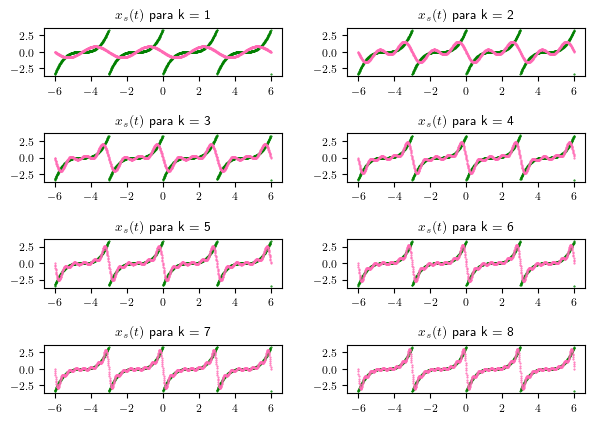

In [7]:
K=8
COLs = 2 #cols of plt
ROWs = 1 + (K-1) // COLs #rows of plt
plt.rcParams['font.size'] = 8
fig, axs = plt.subplots(ROWs, COLs)
fig.tight_layout(rect=[0, 0, 1, 0.95], pad=3.0)

for k in range(1, K + 1):
    
    coefs = coeficientes_de_fourier(x,k)

    x_s_t = sinusoide_k(t, coefs)
    
    row = (k-1) // COLs
    col = (k-1) % COLs

    axs[row, col].scatter(t, x_t, color='green', s=1, marker='.')
    axs[row, col].scatter(t, x_s_t, color='hotpink', s=1, marker='.')
    axs[row, col].set_title(r'$x_s(t)$ para k = ' + str(k))
plt.show()

## Que tal escutarmos funções senoidais simples com diferentes frequencias??

<!-- <img src="figs/5b16cf4e28847.jpeg"  width="20%" height="20%"> -->

In [305]:
from IPython.display import Audio

fs = 44100  # sampling frequency, Hz This is the rate at which CDs are sampled.
T = 0.5  # note length, seconds
A = 440  # Note frequency, Hz
w_0 = 2*np.pi*fs

t = np.linspace(0, T, int(T*fs), endpoint=False) # time variable
dt = t[1]  # Sampling time
def senoide_simplificada(frequency):
    return np.sin(t*w_0*frequency*t)                # pure sine wave at 440 Hz

# load a NumPy array
Audio(senoide_simplificada(A), rate=fs)

In [172]:
scalet = np.linspace(0, T*13, int(T*fs*13), endpoint=False)

scale = np.concatenate([senoide_simplificada(A*2**(i/12.)) for i in range(13)])
Audio(scale, rate=fs)

## Transformada de Fourier

As séries de Fourier são extremamente úteis para representar funções periódicas (pois uma série de Fourier é inerentemente periódica). Contudo, muitas vezes, nós precisamos lidar com funções não-periódicas. 
Uma ferramente mais generalista que as Séries de Fourier são necessárias pra representar também funções não periódicas. Nespa segunda parte do Módulo 4 do nosso curso, iremos apresentar essa função mais geral, e ela se chama **Transformada de Fourier**!

<img src="figs/Morty.jpg"  width = "700">

## A transformada de Fourier

Antes de falarmos sobre a transformada de Fourier, vamos falar mais um pouco sobre frequencia e domínio da frequencia...

Acabamos de aprender que a Série de Fourier representa qualquer sinal periódico como uma soma de senóides complexas. 

Senóides podem ser definidas em termos de frequencia e amplitude, certo? Abaixo temos três senóides diferentes com três frequencias distintas:

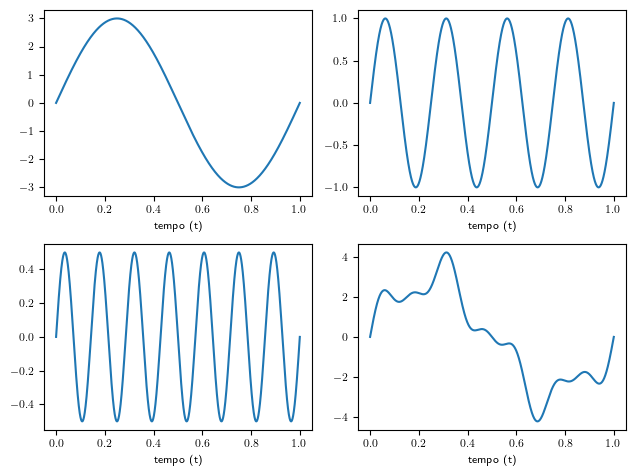

In [89]:
from scipy.fft import fft, ifft

# Taxa de amostragem
sr = 2000
# # Intervalo de amostragem
# ts = 1.0/sr

t = np.linspace(0,1,sr)

freq = 1
senoide1 = 3*np.sin(2*np.pi*freq*t)

freq = 4
senoide2 = np.sin(2*np.pi*freq*t)

freq = 7   
senoide3 = 0.5* np.sin(2*np.pi*freq*t)

x = senoide1+senoide2+senoide3

# #vizualização
fig, ax = plt.subplots(2,2)

ax[0,0].plot(t, senoide1)
ax[0,0].set_xlabel ('tempo (t)')
ax[0,1].plot(t, senoide2)
ax[0,1].set_xlabel ('tempo (t)')
ax[1,0].plot(t, senoide3)
ax[1,0].set_xlabel ('tempo (t)')
ax[1,1].plot(t, x)
ax[1,1].set_xlabel ('tempo (t)')

plt.tight_layout()
plt.show()

Aplicando a transformada de Fourier no sinal $x$:

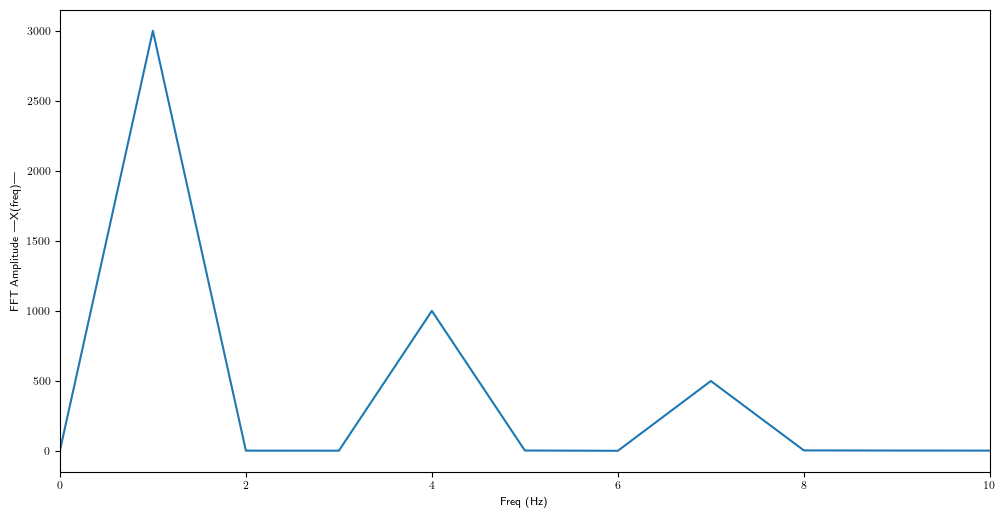

In [90]:
X = np.fft.fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
# plt.subplot(121)

plt.plot(freq, np.abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.show()

Alguém pode se perguntar se podemos de alguma forma usar a série de Fourier para desenvolver uma representação para funções aperiódicas. Acontece que isso é possível em algumas situações específicas. Para entender o porquê, devemos fazer a seguinte observação chave: **Uma função aperiódica pode ser vista como uma função periódica com período infinito**

Ao visualizar uma função aperiódica como este caso limite de uma função periódica onde o período é infinito, podemos usar a série de Fourier para desenvolver uma representação de função mais geral que pode ser usada no caso aperiódico.



✅ Suponha que temos uma função aperiódica $x$. Mostrada no gráfico abaixo:


<img src="figs/x_t.png"  width = "700">


✅ A partir de $x$, vamos definir a função $x_T$ como:


\begin{equation}
    x_T(t) = 
    \begin{cases}
      x(t) \;\;\; -\frac{T}{2} \le t \le \frac{T}{2}\\
      0 \;\;\; \text{caso contrário}
    \end{cases}\,.
\end{equation}

Com seu gráfico:

<img src="figs/x_T_t.png"  width="700">



Em outras palavras, $x_T(t)$ é idêntica a $x(t)$ no intervalo $-\frac{T}{2} \le t \le \frac{T}{2}$ e zero em caso contrário. 

✅ Vamos agora repetir $x_T(t)$ definida em $-\frac{T}{2} \le t \le \frac{T}{2}$ para formar uma uma função periódica $\widetilde{x}$ de período T, definida como segue:

$\widetilde{x}(t) = x_T(t)\;\; \text{para} -\frac{T}{2} \le t \le \frac{T}{2}$

e

$\widetilde{x}(t) = \widetilde{x}(t+T)$

<img src="figs/tilde_x_t.png"  width="700">

Antes de prosseguirmos, precisamos fazer duas observações importantes:


$$\lim_{T\rightarrow \infty} x_T(t) = x(t)$$



$$\lim_{T\rightarrow \infty} \widetilde{x}(t) = x(t)$$


Agora, vamos analizar melhor a função $\widetilde{x}(t)$. Uma vez que ela é periódica, podemos usar a série de Fourier como segue:

<font size="4">$$\widetilde{x}(t) = \sum_{k=-\infty}^{\infty} c_k e^{jk \omega_o t}$$</font>

onde

<font size="4"> $$c_k = \frac{1}{T} \int_{-T/2}^{T/2} \widetilde{x}(t) e^{-jk \omega_o t} dt$$ </font>

<img src="figs/not_bad.jpeg"  width="200">


Sabendo que $\omega_0 = \frac{2\pi}{T}$. Uma vez que $x_T(t) = \widetilde{x}(t)$ em $-\frac{T}{2} \le t \le \frac{T}{2}$, podemos reescrever $c_k$ como:

<font size="4"> $$c_k = \frac{1}{T} \int_{-T/2}^{T/2} x_T(t) e^{-jk \omega_o t} dt$$ </font>

Além disso, uma vez que $x_T(t) = 0$ para $t < -\frac{T}{2}$ e $t > \frac{T}{2}$, podemos novamente reescrever $c_k$ como:

<font size="4"> $$c_k = \frac{1}{T} \int_{-\infty}^{\infty} x_T(t) e^{-jk \omega_o t} dt$$ </font>

Podemos então deduzir que: 

<!-- $$\widetilde{x}(t) = \sum_{k=-\infty}^{\infty} c_k e^{jk \omega_o t} = \sum_{k=-\infty}^{\infty} [\frac{1}{T} \int_{-\infty}^{\infty} x_T(t) e^{-jk \omega_o t} dt] e^{jk \omega_o t} $$ -->

\begin{align*} 
\widetilde{x}(t) = \sum_{k=-\infty}^{\infty} c_k e^{jk \omega_o t} & = \sum_{k=-\infty}^{\infty} \left[ \frac{1}{T} \int_{-\infty}^{\infty} x_T(\tau ) e^{-jk \omega_o t} d\tau \right] e^{jk \omega_o t} \\ 
& = \sum_{k=-\infty}^{\infty} \left[\frac{\omega_0}{2\pi} \int_{-\infty}^{\infty} x_T(\tau ) e^{-jk \omega_o t} d \tau \right] e^{jk \omega_o t}\\
& = \frac{1}{2\pi} \sum_{k=-\infty}^{\infty} \left[\int_{-\infty}^{\infty} x_T(\tau ) e^{-jk \omega_o t} d\tau] \right] e^{jk \omega_o t} \omega_0
\end{align*}

Sabendo que:

$$x(t) = \lim_{T\rightarrow \infty} \widetilde{x}(t)$$

reescrevemos $\widetilde{x}(t)$ como segue:

$$x(t) =  \lim_{T\rightarrow \infty} \frac{1}{2\pi} \sum_{k=-\infty}^{\infty} \left[\int_{-\infty}^{\infty} x_T(\tau ) e^{-jk \omega_o t} d\tau] \right] e^{jk \omega_o t} \omega_0 $$

Agora, devemos calcular o limite acima (🤯🤯🤯🤯).

Como $T \rightarrow \infty$, temos que $\omega_o \rightarrow 0$. Assim, no limite acima, $k \omega_0$ se torna uma variável contínua que denotaremos como $\omega$, $\omega_0$ torna-se o infinitesimal $d\omega$ e o somatório torna-se uma integral. Também, a medida que $T \rightarrow \infty$, nós temos que $x_T \rightarrow x$. 

Combinando essas informações, obtemos:

$$x(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega) e^{j\omega t} d\omega$$

em que

$$X(\omega) = \int_{-\infty}^{\infty} x(t) e^{-j\omega t} dt$$



Printinho!!! Chegamos a ela, a belíssima transformada de Fourier!

Veja que encontramos uma representação da função aperiódica $x(t)$ em termos de senoides complexas em todas as frequências $\omega$. 
Chamamos isso de **representação da transformada de Fourier** da função $x$.


<img src="figs/emotion.jpeg"  width="200">


Nota importante: 

Nós utilizamos um processo limitante envolvendo as equações de análise e síntese para séries de Fourier para desenvolver uma nova ferramenta matemática conhecida como transformada de Fourier. 

Acontece que muitas funções de interesse prático não possuem uma transformada de Fourier no sentido da definição desenvolvida anteriormente. 

Ou seja, para uma dada função $x$, o interesse prático integral da transformada de Fourier não possui uma transformada de Fourier no sentido da definição desenvolvida anteriormente. Ou seja, para uma dada função $x$, a integral da transformada de Fourier pode não convergir,nesse caso, a transformada de Fourier $X$ de $x$ não existe. Por exemplo, a integral anterior não converge se $x$ for qualquer um dos seguintes sinais (assim como muitas outras possibilidades):

* Uma função constante diferente de 0;
* uma função periódica específica (ex: uma sinusóide complexa);
* Uma função degral (ex.: $u(t)$); ou
* uma função sinal (ex.: $sgn(t)$)


No entanto, funções como essas são de grande interesse prático. Portanto, é altamente desejável ter uma ferramenta matemática que possa lidar com tais funções. Isso motiva o desenvolvimento do que é chamado de transformada de Fourier generalizada.

A transformada de Fourier generalizada existe para funções periódicas, funções constantes diferentes de zero e muitos outros tipos de funções também. A matemática subjacente associada à transformada de Fourier generalizada é bastante complicada. Portanto, não tentaremos desenvolver formalmente a transformada de Fourier generalizada aqui.

Embora não totalmente correto, pode-se pensar na transformada de Fourier generalizada como sendo definida pelas mesmas fórmulas da transformada de Fourier clássica.

Assim, por esta e outras razões, podemos ignorar a distinção entre a transformada de Fourier generalizada e a transformada de Fourier clássica e pensar nelas como sendo a mesma coisa.

## Alguns exemplos da Transformada de Fourier

### Exemplo 1

Acalme seu coração (🤯🤯🤯🤯) que daqui pra frente utilizaremos recursos do pacote `scipy` do python para calcular a transformada de fourier sobre sinais $x(t)$ periódicos e aperiódicos.
Na verdade o `scipy` implementa uma versão rápida da transformada de Fourier! O objetivo dela é reduzir o custo computacional da operação.

Para saber mais sobre ela [Clica aqui!](https://towardsdatascience.com/fast-fourier-transform-937926e591cb) 

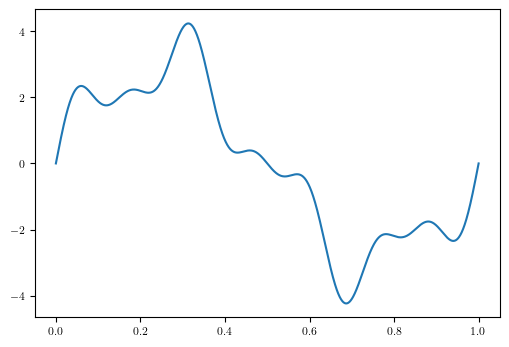

In [91]:
from scipy.fft import fft, ifft

# Taxa de amostragem
sr = 2000
# # Intervalo de amostragem
# ts = 1.0/sr

t = np.linspace(0,1,sr)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (6, 4))
plt.plot(t,x)
plt.show()

Apliclar a transformada de fourier no `scipy` é simples!

In [76]:
from scipy.fft import fft, ifft

X = fft(x)

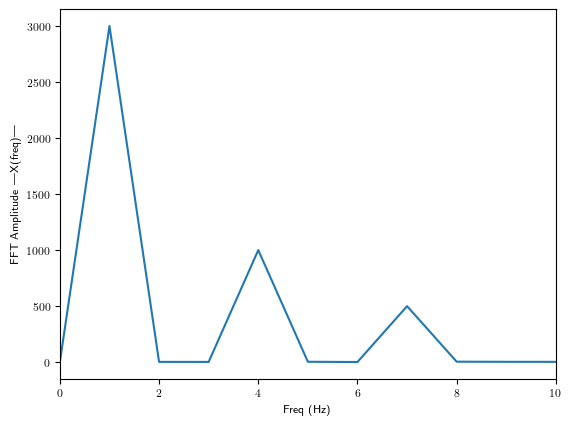

In [92]:
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

# plt.subplot(222)
plt.plot(freq, np.abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.show()

Como eu faço para voltar do universo das frequencias para o universo do tempo?

Só aplicar a transformada de Fourier inversa!

/Users/fabianequeiroz/miniforge3/envs/aulas/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


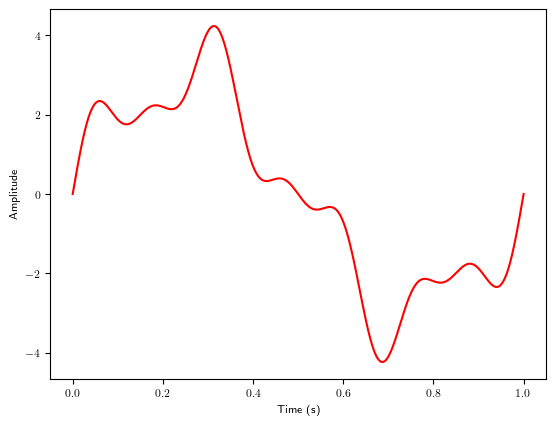

In [93]:

plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

<Figure size 600x400 with 0 Axes>

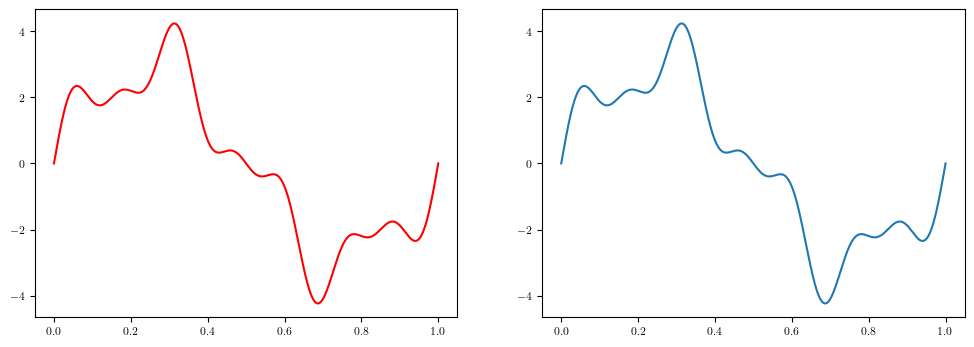

In [82]:
plt.figure(figsize = (6, 4))

new_x = ifft(X)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(t,new_x, color="red")
plt.subplot(122)
plt.plot(t,x)
plt.show()

### Exemplo 2

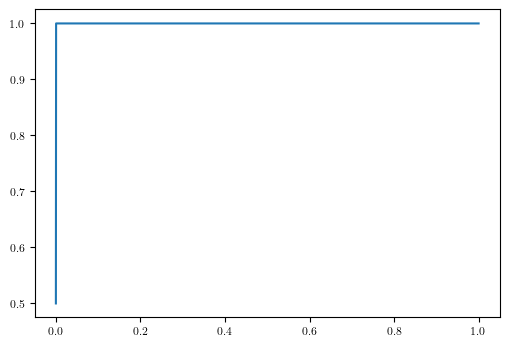

In [94]:
# x1 = np.heaviside(t, 0.5)

x1 = np.heaviside(t, 0.5)

plt.figure(figsize = (6, 4))
plt.plot(t,x1)
plt.show()

In [95]:
X1 = fft(x1)


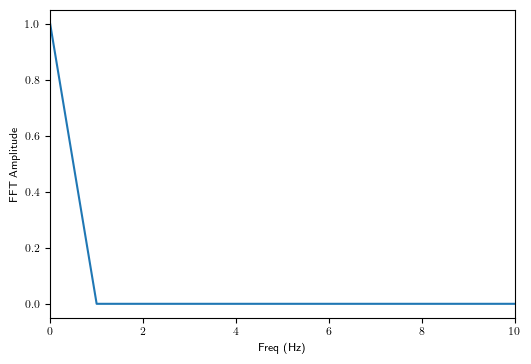

In [97]:
N = len(X1)
n = np.arange(N)
T = N/sr
freq = n/T 


plt.figure(figsize = (6, 4))
plt.plot(freq, np.abs(X1)/2000)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude')
plt.xlim(0, 10)

plt.show()

## Aplicacões da Tranformada de Fourier

A transformada de Fourier é útil em muitas aplicações. Por exemplo, 

✅ Shazam e outros serviços de identificação de música usam a transformada de Fourier para identificar músicas.

✅ A compactação JPEG usa uma variante da transformada de Fourier para remover os componentes de alta frequência das imagens. 

✅ O reconhecimento de fala usa a transformada de Fourier e transformações relacionadas para recuperar as palavras faladas do áudio bruto.

Em geral, você precisa da transformada de Fourier se precisar observar as frequências em um sinal. Se for difícil trabalhar com um sinal no domínio do tempo, vale a pena tentar usar a transformada de Fourier para movê-lo para o domínio da frequência. 
